In [1]:
import matplotlib.pyplot as plt
# from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)
    
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [3]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

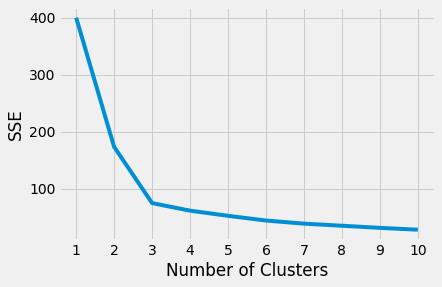

In [4]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [5]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [6]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

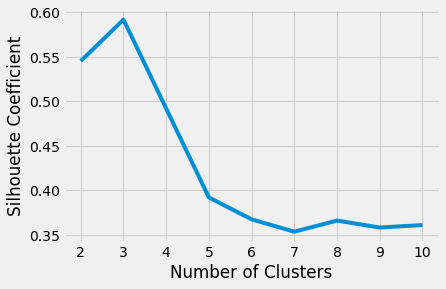

In [7]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [9]:
features, true_labels = make_blobs(
    n_samples=250, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [10]:
features

array([[-1.59379551,  9.34303724],
       [ 4.15451529,  2.05504382],
       [ 5.72293008,  3.02697174],
       [-1.54582149,  9.42706706],
       [-7.77804186, -6.38819042],
       [-6.54731318, -7.62859613],
       [ 4.16794697,  3.06212028],
       [-3.92456837,  8.59364081],
       [ 4.68545068,  1.32156934],
       [ 5.21076935,  3.10873532],
       [ 5.45274096,  2.60279853],
       [-7.14903403, -6.16256734],
       [-2.30033403,  7.054616  ],
       [ 5.53947871,  2.2804692 ],
       [ 4.16493353,  1.31984045],
       [-3.18611962,  9.62596242],
       [-7.3506655 , -6.64805966],
       [ 4.99689432,  1.28026009],
       [-4.81887927, -5.12476875],
       [ 5.05281029,  1.40944513],
       [ 3.86705362,  1.73635108],
       [-3.74614833,  7.69382952],
       [-2.96983639, 10.07140835],
       [ 3.92457513,  2.65276743],
       [-6.65553471, -6.86751719],
       [ 4.7368748 ,  2.56832671],
       [ 3.79308512,  0.45832246],
       [-3.49973395,  8.4479884 ],
       [-2.16557933,

In [11]:
true_labels

array([0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0,
       0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1,
       1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2,
       1, 1, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2,
       1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2,
       2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0,
       1, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 2, 0])

In [12]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
print(f"KMEANS sil score: {kmeans_silhouette}")
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)
print(f"DBSCAN sil score: {dbscan_silhouette}")

KMEANS sil score: 0.68
DBSCAN sil score: 0.73


In [13]:
dbscan.labels_

array([ 0,  1,  1,  0,  2,  2,  1,  0,  1,  1,  1,  2,  0,  1,  1,  0,  2,
        1,  2,  1,  1,  0,  0,  1,  2,  1,  1,  0,  0,  0,  0,  2,  1,  2,
        0,  0,  2,  2, -1,  2,  1,  0,  0,  1,  1,  0,  0,  2,  1,  0,  2,
        0,  1,  2,  2,  1,  1,  2,  1,  1,  1,  2,  2,  1,  0,  2,  1,  1,
        2,  0,  0,  2,  0,  2,  2,  0,  1,  1,  0,  0,  2,  2,  2,  2,  0,
        1,  2,  2,  1,  2,  2,  2,  1,  0,  1,  2,  2,  0,  2,  0,  0,  1,
        1,  2,  2,  1,  0,  0,  2,  2,  2,  2,  0,  1,  2,  0,  1,  2,  1,
        2,  2,  0,  1,  0,  2,  0,  1,  2,  1,  0,  1,  1,  0,  2,  1,  2,
        0,  1,  1,  1,  1,  1,  0,  2,  1,  0,  2,  0,  1,  0,  0,  1,  1,
        0,  1,  2,  2,  2,  0,  0,  2,  1,  1,  0,  2,  0,  0,  2,  2,  1,
        2,  2,  1,  0,  0,  0,  1,  0,  0,  0,  2,  2,  0,  1,  2,  1,  1,
        0,  0,  2,  2,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  1,  0,  0,
        1,  2,  0,  0,  0,  2,  1,  0,  1,  0,  2,  2,  0,  1,  2,  2,  2,
        2,  2,  2,  2,  1

[0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 100, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0]


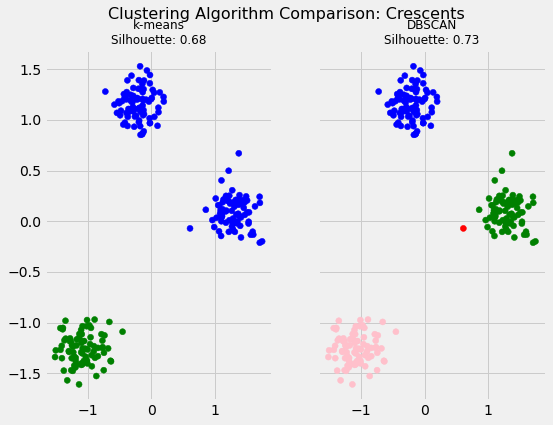

In [14]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "blue",
    1: "green",
    2: "pink",
    3: "yellow",
    4: "brown",
    100: "red",
    
}

# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
dbscan_labels = [label  if label >=0 else 100 for label in dbscan.labels_]
print([label for label in dbscan_labels])
db_colors = [fte_colors[label] for label in dbscan_labels]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

In [15]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

round(ari_kmeans, 2)
round(ari_dbscan, 2)

0.99

In [43]:
from os import walk

filenames = next(walk('../data/fonts_small'), (None, None, []))[2]  # [] if no file
filenames

['festus.ttf',
 'fredfont.ttf',
 'bethhandregular.ttf',
 'dipedthick.ttf',
 'JungleBold.ttf',
 'brody.ttf',
 'FatTip.TTF',
 'HIROSHT.TTF',
 'INTHCITY.TTF',
 'JungleClean.ttf',
 'comicstrip.ttf',
 'GRAFFITI2.TTF',
 'dearteachernormal.ttf',
 'budhandbold.ttf',
 'GARTHRG_.TTF',
 'GOODBYE_.TTF',
 'architextregular.ttf',
 'cezanneregular.ttf',
 'grooteskbold.ttf',
 'augie.ttf',
 'eraser.TTF',
 'brooklyn.TTF',
 'comixhighlightregular.ttf',
 'firstgrader.ttf',
 'JungleRuff.ttf']

In [77]:
from fontTools.ttLib import TTFont
import glob

short_names = []
families = []
modifiers = []
modifiers2 = []


for file in filenames:
    font = TTFont(f"../data/fonts_small/{file}")
    short_name = describe.shortName(font)[0]
    short_names.append(short_name.decode())
    families.append(describe.family(font)[0])
    modifiers.append(describe.modifiers(font)[0])
    modifiers2.append(describe.modifiers(font)[1])
    
display(modifiers)
display(modifiers2)

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp out of range; ignoring top bytes
'modified' timestamp out of range; ignoring top bytes
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp out of range; ignoring top bytes
'modified' timestamp out of range; ignoring top bytes
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp out of range; ignoring top bytes
'modified' timestamp out of range; ignoring top bytes
'created' timestamp out of range; ignoring top bytes
'modified' timestamp out of range; ignoring top bytes
'created' timestamp seems very low; regarding as unix ti

[400,
 400,
 400,
 400,
 700,
 400,
 400,
 400,
 5,
 100,
 400,
 400,
 400,
 600,
 400,
 400,
 5,
 5,
 400,
 400,
 400,
 400,
 5,
 400,
 100]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [78]:
import pandas as pd

df = pd.DataFrame(data=[i for i in zip(short_names, families, modifiers, modifiers2)], columns = ["sn","f","m","m2"])
df

,sn,f,m,m2
0,festus!,ANY,400,0
1,Fredfont,ANY,400,0
2,BethHand Regular,ANY,400,0
3,DiPed Thick,SANS,400,0
4,Jungle Bold,ANY,700,0
5,Brody,ANY,400,0
6,FATTIP,ANY,400,0
7,Hirosh,ANY,400,0
8,Inthacity Regular,ANY,5,0
9,Jungle Clean,ANY,100,0


In [86]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/agoia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [89]:
import re

import pandas as pd
from nltk.corpus import stopwords
import re
stop = set(stopwords.words("english"))

def preprocess(text):
    text_input = re.sub('[^a-zA-Z1-9]+', ' ', str(text))
    output = re.sub(r'\d+', '',text_input)
    return output.lower().strip()

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

df['sn'] = df.sn.map(preprocess)
df['sn'] = df.sn.map(remove_stopwords)
df

df['f'] = df.f.map(preprocess)
df['f'] = df.f.map(remove_stopwords)

In [92]:
def build_corpus(data):
    corpus = []
    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(df['sn'])
corpus

[['festus'],
 ['fredfont'],
 ['bethhand', 'regular'],
 ['diped', 'thick'],
 ['jungle', 'bold'],
 ['brody'],
 ['fattip'],
 ['hirosh'],
 ['inthacity', 'regular'],
 ['jungle', 'clean'],
 ['comic', 'strip'],
 ['graffiti'],
 ['dearteacher', 'normal'],
 ['budhand', 'bold'],
 ['garth', 'hand'],
 ['goodbye', 'cruel', 'world'],
 ['architext', 'regular'],
 ['cezanne', 'regular'],
 ['grootesk', 'bold'],
 ['augie'],
 ['eraser'],
 ['brooklyn', 'kid'],
 ['comixhighlight', 'regular'],
 ['first', 'grader'],
 ['jungle', 'ruff']]

In [ ]:
# https://python.plainenglish.io/clustering-textual-data-with-word2vec-866dafbd213f

In [96]:
from gensim.models import Word2Vec
model = Word2Vec(corpus, min_count=1)

In [102]:
model.wv.index_to_key

['regular',
 'bold',
 'jungle',
 'fattip',
 'strip',
 'comic',
 'clean',
 'inthacity',
 'hirosh',
 'ruff',
 'brody',
 'dearteacher',
 'thick',
 'diped',
 'bethhand',
 'fredfont',
 'graffiti',
 'normal',
 'grader',
 'grootesk',
 'first',
 'comixhighlight',
 'kid',
 'brooklyn',
 'eraser',
 'augie',
 'cezanne',
 'budhand',
 'architext',
 'world',
 'cruel',
 'goodbye',
 'hand',
 'garth',
 'festus']

In [ ]:
from sklearn.decomposition import PCA

# fit a 2d PCA model to the vectors
vectors = model.wv
words = list(model.wv.index_to_key)
pca = PCA(n_components=3)
PCA_result = pca.fit_transform(vectors)



In [104]:
# prepare a dataframe
words = pd.DataFrame(words)
PCA_result = pd.DataFrame(PCA_result)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]

NameError: name 'PCA_result' is not defined

ERROR! Session/line number was not unique in database. History logging moved to new session 244


In [80]:
# from kmodes.kprototypes import KPrototypes
# kproto = KPrototypes(n_clusters=2, verbose=2, max_iter=20)
# kproto.fit(df_array, categorical=cat_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.


NameError: name 'df_array' is not defined

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

def cluster_text(text):
    vectorizer = TfidfVectorizer(stop_words={'english'})
    X = vectorizer.fit_transform(text)

    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    Sum_of_squared_distances = []
    K = range(2,10)
    for k in K:
       km = KMeans(n_clusters=k, max_iter=200, n_init=10)
       km = km.fit(X)
       Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    print('How many clusters do you want to use?')
    true_k = int(input())
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)

    labels=model.labels_
    clusters=pd.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
    #print(clusters.sort_values(by=['cluster']))

    for i in range(true_k):
        print(clusters[clusters['cluster'] == i])
        
    return

cluster_text(read('../data/fonts_small/architextregular.ttf'))

NameError: name 'read' is not defined

In [18]:
describe.shortName(font)
# describe.weightNumber(name[0])
describe.family(font)
describe.modifiers( font )

(b'Architext Regular', b'Architext')

In [24]:
from fontTools import ttLib
tt = ttLib.TTFont('../data/fonts_small/architextregular.ttf') # Load an existing font file
tt

In [37]:
tt.saveXML("font.ttx")